Importing important libraries.

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

Reading the csv file

In [10]:
df = pd.read_csv("Titanic-Dataset.csv")

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
df.shape

(891, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Drop the column cabin because it has to much null values

In [16]:
df=df.drop(columns='Cabin',axis=1)

In [27]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [20]:
df['Age'].fillna(df['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [24]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [31]:
df['Survived'].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [32]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

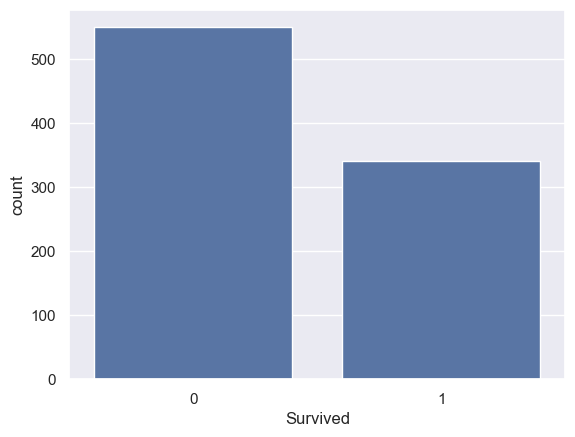

In [30]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Sex', ylabel='count'>

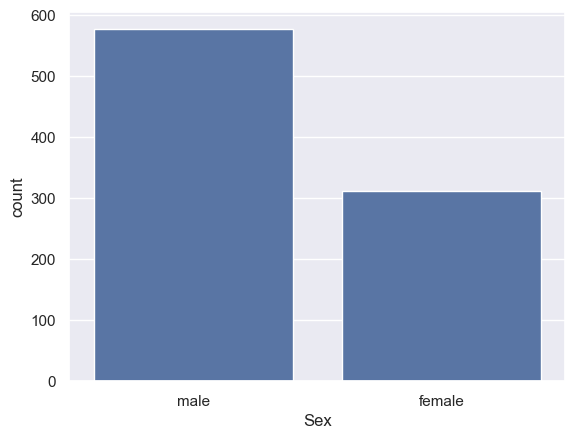

In [33]:
sns.countplot(x='Sex',data=df)

<Axes: xlabel='Sex', ylabel='count'>

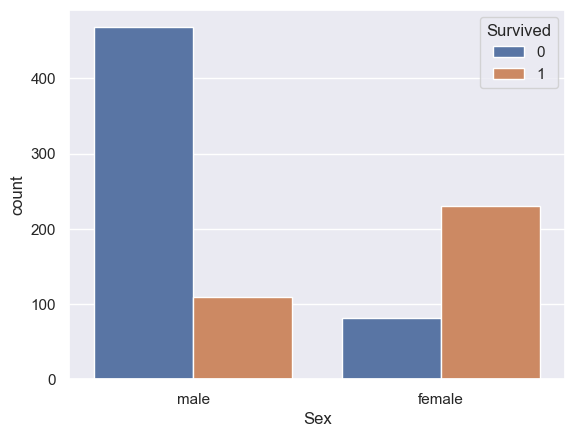

In [34]:
sns.countplot(x='Sex',hue='Survived',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

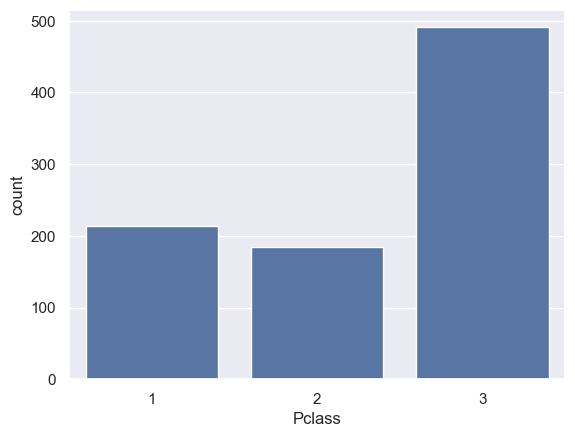

In [37]:
sns.countplot(x='Pclass',data=df)

<Axes: xlabel='Pclass', ylabel='count'>

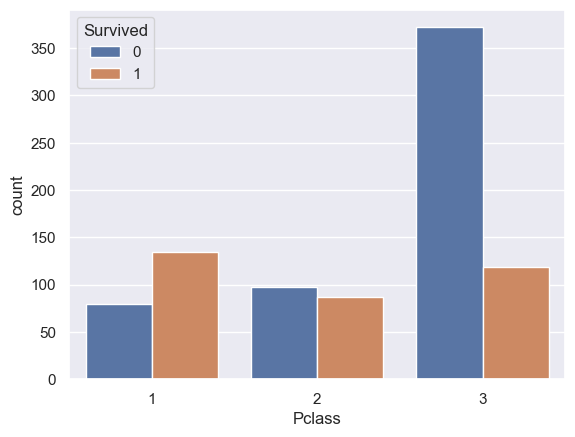

In [38]:
sns.countplot(x='Pclass',hue='Survived',data=df)

In [40]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [41]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [42]:
int_df = df.select_dtypes(include='int')
correlation = int_df.corr()
print(correlation)

             PassengerId  Survived    Pclass       Sex     SibSp     Parch
PassengerId     1.000000 -0.005028 -0.035330  0.043136 -0.057686 -0.001657
Survived       -0.005028  1.000000 -0.335549 -0.541585 -0.034040  0.083151
Pclass         -0.035330 -0.335549  1.000000  0.127741  0.081656  0.016824
Sex             0.043136 -0.541585  0.127741  1.000000 -0.116348 -0.247508
SibSp          -0.057686 -0.034040  0.081656 -0.116348  1.000000  0.414542
Parch          -0.001657  0.083151  0.016824 -0.247508  0.414542  1.000000


<Axes: >

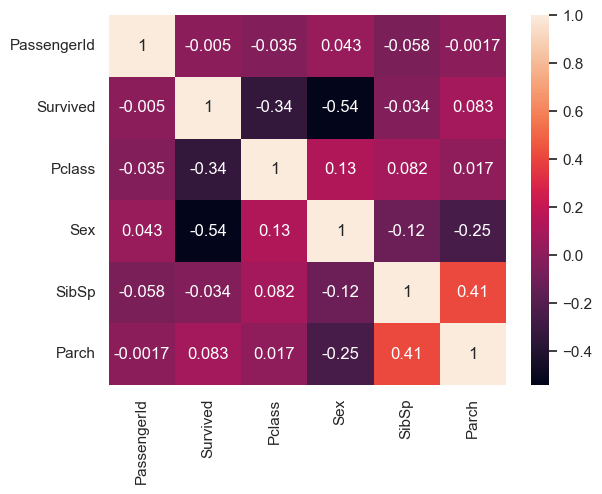

In [43]:
sns.heatmap(correlation,annot=True)

In [44]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,True


In [47]:
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['Pclass'] = scaler.fit_transform(df[['Pclass']])

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,0.825209,"Braund, Mr. Owen Harris",1,-0.590495,1,0,A/5 21171,7.2500,False,True
1,2,1,-1.572211,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.643971,1,0,PC 17599,71.2833,False,False
2,3,1,0.825209,"Heikkinen, Miss. Laina",0,-0.281878,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,-1.572211,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.412509,1,0,113803,53.1000,False,True
4,5,0,0.825209,"Allen, Mr. William Henry",1,0.412509,0,0,373450,8.0500,False,True


In [49]:
df.drop(['PassengerId', 'Ticket','Name','Fare'], axis=1, inplace=True)

In [50]:
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)

In [51]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S
0,0,0.825209,1,-0.590495,1,0,0,1
1,1,-1.572211,0,0.643971,1,0,0,0
2,1,0.825209,0,-0.281878,0,0,0,1
3,1,-1.572211,0,0.412509,1,0,0,1
4,0,0.825209,1,0.412509,0,0,0,1
...,...,...,...,...,...,...,...,...
886,0,-0.373501,1,-0.204724,0,0,0,1
887,1,-1.572211,0,-0.821957,0,0,0,1
888,0,0.825209,0,0.003524,1,2,0,1
889,1,-1.572211,1,-0.281878,0,0,0,0


In [52]:
X=df.drop(columns=['Survived'],axis=1)

In [53]:
Y= df['Survived']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [56]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [57]:
model.fit(X_train,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [58]:
X_train_prediction=model.predict(X_train)

In [59]:
print(X_train_prediction)

[0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0
 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1
 1 0 0 1 0 0 0 1 0 1 1 0 

In [61]:
train_data_accuracy=accuracy_score(Y_train,X_train_prediction)

In [62]:
train_data_accuracy

0.8002812939521801

In [63]:
print(f"Accuracy of Model: {int(train_data_accuracy*100)}%")

Accuracy of Model: 80%
